In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Sales 단위는 millions

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
platform_count = df.groupby('Platform').Name.count().sort_values(ascending=False)
platform_count

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

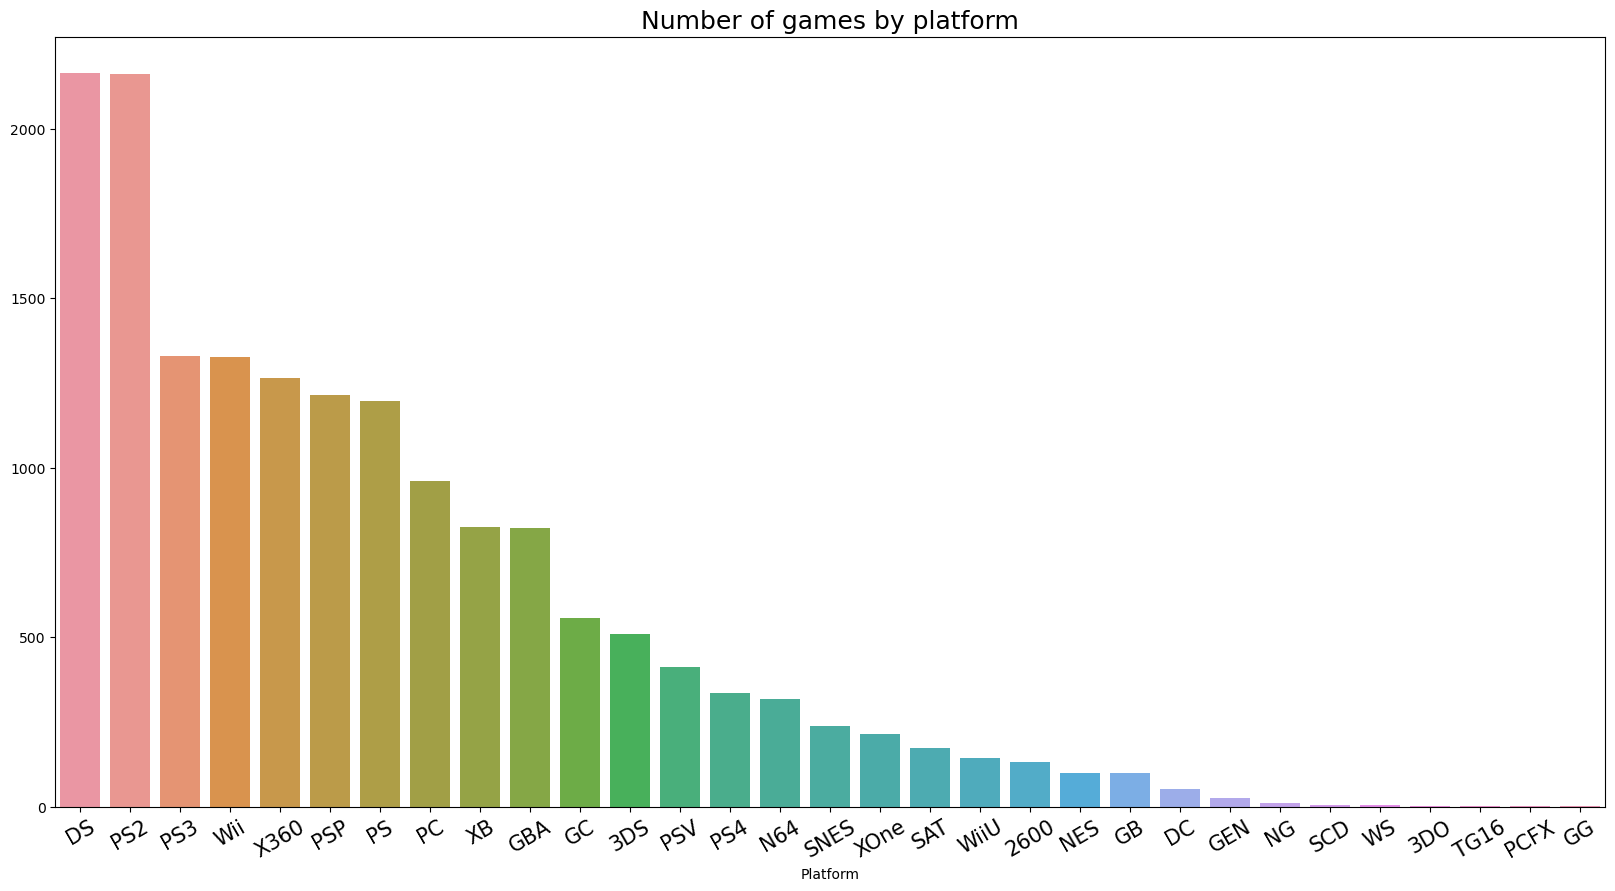

In [6]:
plt.figure(figsize=(20, 10))

sns.barplot(x = platform_count.index, y=platform_count.values)
plt.title('Number of games by platform', fontsize=18)
plt.xticks(rotation=30)
plt.xticks(fontsize=15)
plt.show()

## 1. 플랫폼별 게임 숫자

* DS, PS2가 비슷하게 많은걸 보여줌
* 그 뒤를 PS3, WII, X360, PSP ,PS, PC가 뒤를 이었다.

In [7]:
platform_sales = df.groupby('Platform').Global_Sales.sum().sort_values(ascending=False)
platform_sales

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

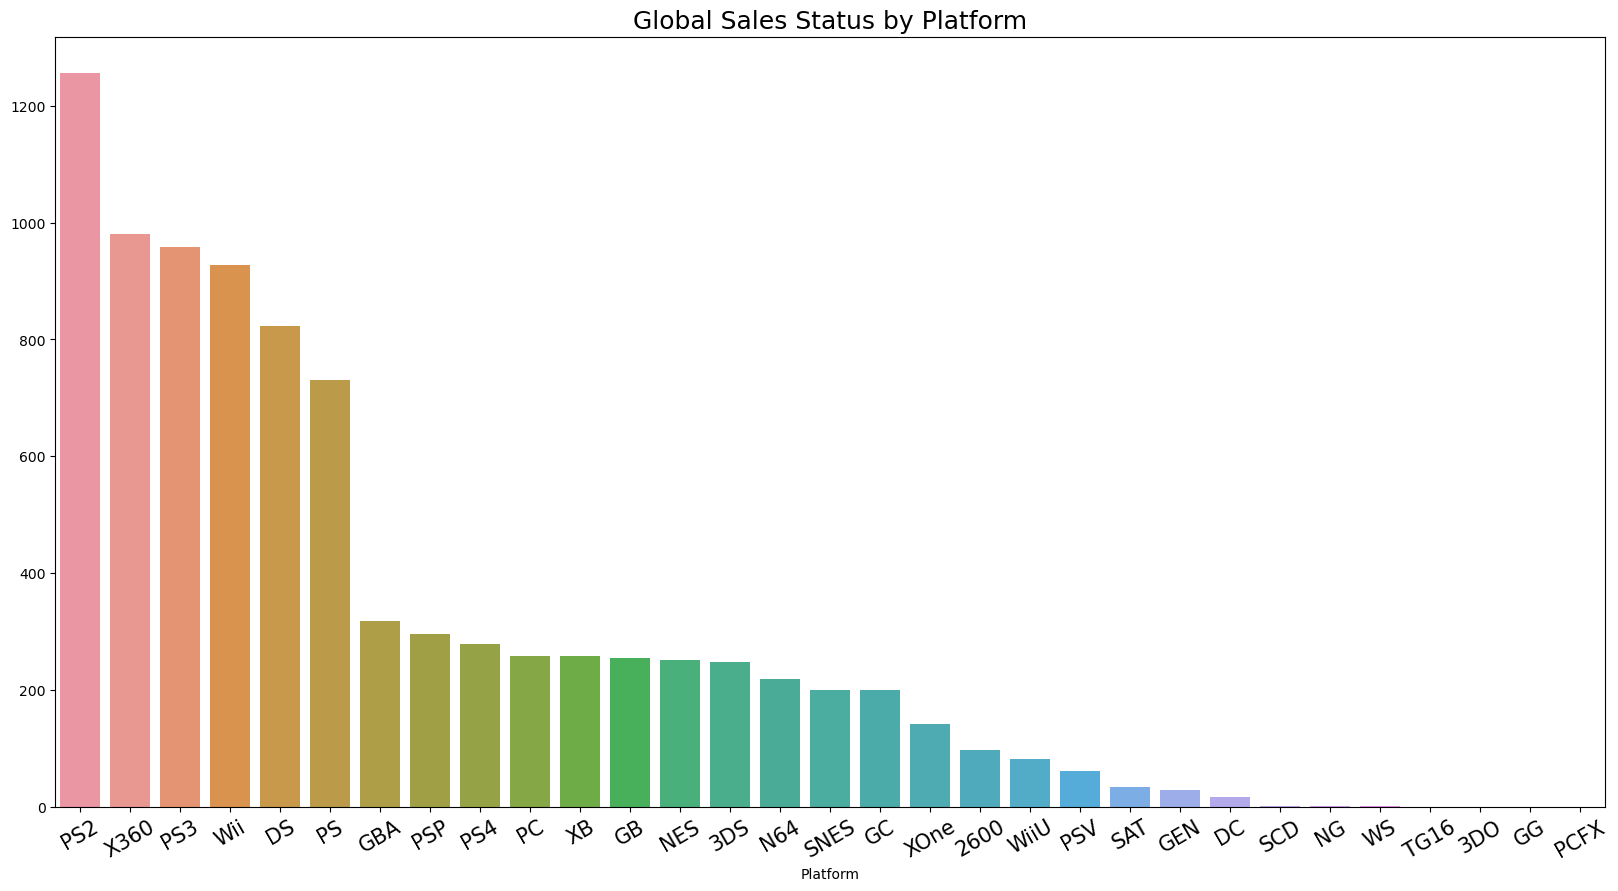

In [8]:
plt.figure(figsize=(20,10))

sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Global Sales Status by Platform', fontsize=18)
plt.xticks(rotation=30)
plt.xticks(fontsize=15)
plt.show()

## 2. 글로벌 판매 현황

* PS2의 게임수가 많기 때문에 판매량도 높다는걸 보여주지만 DS의 경우는 게임수는 가장 많았지만 판매량은 5위에 그친걸 볼 수 있다.
* PS2, X360, PS3, WII, DS, PS 여섯가지 플랫폼이 다른 플랫폼에 비해 높은 판매량을 보여준다.
* 게임숫자에서 높았던 PSP와 PC가 판매량이 낮은걸 보여주고 있고 게임숫자에서 조금 낮았던 GBA가 그 위치를 대신하는걸 보여준다.
* 특히 GB의 경우 가장눈에 띄는데 이유는 게임수의 순위는 22위 판매량은 12위를 보여주기 떄문이다.
* PS, X, WII 등 3개의 게임사가 가장 큰 게임플랫폼 인데 PS시리즈가 가장 높은 판매량을 기록하는걸 볼 수 있다.

In [9]:
df_Publisher_count = df.groupby('Publisher').Name.count().sort_values(ascending=False).head(30)
df_Publisher_sales = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).head(30)

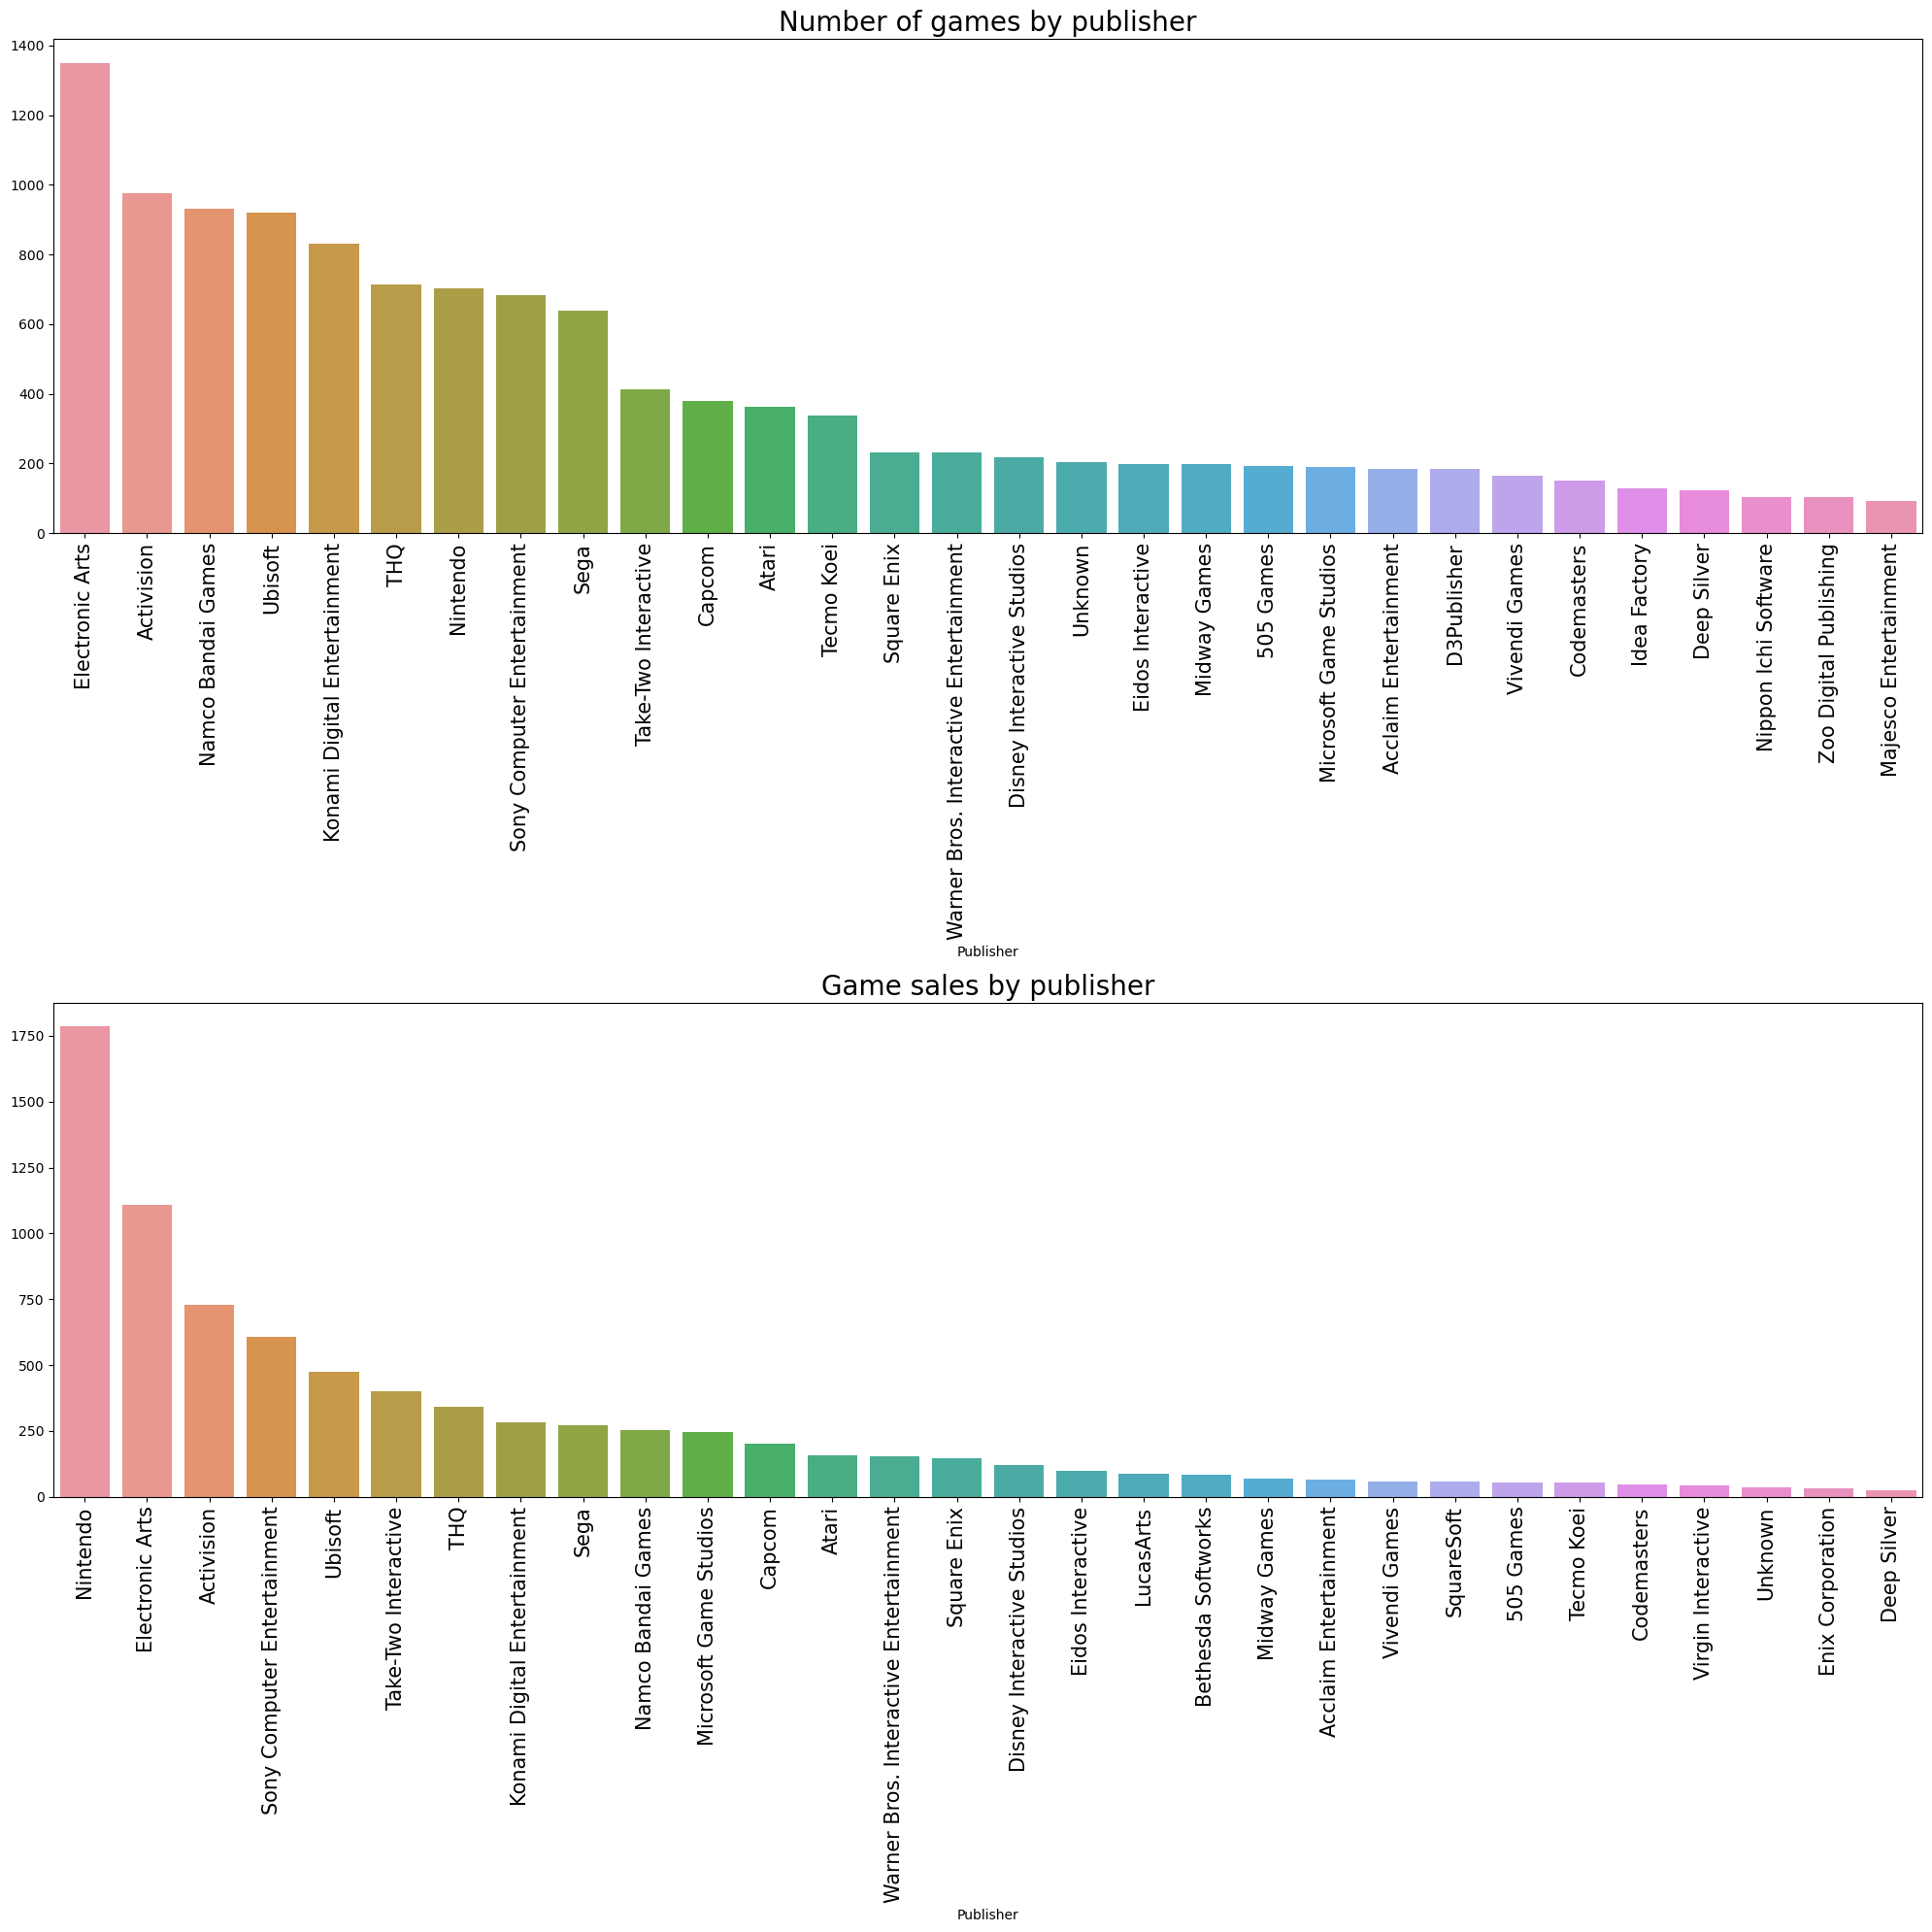

In [14]:
fig, axes = plt.subplots(2,1, figsize=(20, 20))

sns.barplot(x=df_Publisher_count.index, y=df_Publisher_count.values, ax=axes[0])
axes[0].set_xticklabels(df_Publisher_count.index, rotation=90, fontsize=15)
axes[0].set_title('Number of games by publisher', fontsize=20)
sns.barplot(x=df_Publisher_sales.index, y=df_Publisher_sales.values, ax=axes[1])
axes[1].set_xticklabels(df_Publisher_sales.index, rotation=90, fontsize=15)
axes[1].set_title('Game sales by publisher', fontsize=20)

plt.tight_layout()
plt.show()

## 3. 판매사의 게임 수, 글로벌 판매 수

* Electronic Arts의 게임 숫자가 가장 높고 그뒤를 이어 Activision, Namco Bandai, Ubisoft, Konami 등이 이어지는걸 볼 수 있다.
* 하지만 두번째 그래프를 보게되면 Nintendo의 판매량이 압도적으로 높고 뒤를 이어 게임 숫자가 많은 Electronic Arts, Activision가 있고 Sony와 Take-Two가 게임 숫자에 비해 판매량이 높은걸 볼 수 있고, 이에 반해 Konami, Namco Bandai는 게임 수에 비해 판매량이 낮은걸 보여준다.

**따라서 플랫폼은 세계적으로 비디오게임 산업에서 플랫폼은 PS가 가장 높고 닌텐도의 게임 판매가 가장 높다는걸 보여준다.**

**닌텐도의 게임은 닌텐도에서 가장 유명한 게임들 슈퍼마리오, 포켓몬스터 등은 PS나 X 시리즈등에서 발매하지않지만 PS나 X 시리즈도 오리지널 게임들은 닌텐도에서 발매하지 않는건 똑같기 때문에 닌텐도의 충성고객들이 더 크다는걸 보여준다는걸 볼 수 있다.**

**또한 PS시리즈의 Sony와 X시리즈의 Microsoft도 판매량을 보게되면 두 회사 다 게임 숫자들에 비해 판매량이 높게 나오는걸 볼 수 있고 이는 플랫폼의 시장 점유율과 같은 순위를 보여주며 Sony의 판매량이 Microsoft의 판매량보다 높다**